# Trying Again
----
Well, so far we have discovered that our classification systems are pretty bad. I suspect that this has a lot to do with filtering of the lower frequencies in the audio samples, as in general the noise introduced during audio recording is located in the lower registers. There might also be issues with the incorrect onsets, so we'll do our best to see if we can get things more lined up this time around. For the sake of time, as in the last notebook, we will test our workings on a smaller sample size of say 5 different classes (out of 91), so that we can better deduce what the major issues will be.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [7]:
import librosa
import librosa.display
from audio_feature_extraction import AudioFeatureExtractor, BatchExtractor, FeatureVisualizer

In [8]:
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')
sns.set()
sns.set_context('talk')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
afe = AudioFeatureExtractor(frame_length=4096, bp_filter=True, preemphasis=True)

In [71]:
x = afe.get_audio('raw_data/XC14208.mp3')

In [72]:
stft = afe.extract_stft(x)

In [73]:
import librosa.display

In [74]:
m, p = librosa.magphase(stft)

In [75]:
D = librosa.amplitude_to_db(m, ref=np.max)

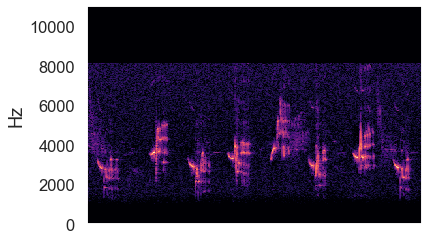

In [76]:
librosa.display.specshow(D, y_axis='linear')

In [66]:
x2 = afe.get_audio('raw_data/XC52379.mp3')

In [67]:
stft2 = afe.extract_stft(x2)

In [68]:
m2, p2 = librosa.magphase(stft2)

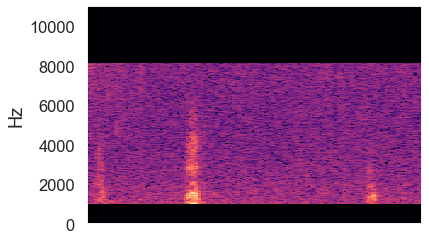

In [69]:
D2 = librosa.amplitude_to_db(m2, ref=np.max)
librosa.display.specshow(D2, y_axis='linear')

In [78]:
bird_index_clean = pd.read_csv('bird_index_clean.csv', index_col=0)

In [79]:
bird_index_clean

,english_cname,file_name,genus,species,label
name,,,,,
XC17804,Abert's Towhee,XC17804.mp3,Melozone,aberti,Melozone aberti
XC177367,Abert's Towhee,XC177367.mp3,Melozone,aberti,Melozone aberti
XC145505,Abert's Towhee,XC145505.mp3,Melozone,aberti,Melozone aberti
XC228159,Abert's Towhee,XC228159.mp3,Melozone,aberti,Melozone aberti
XC51313,Abert's Towhee,XC51313.mp3,Melozone,aberti,Melozone aberti
...,...,...,...,...,...
XC278880,Yellow-breasted Chat,XC278880.mp3,Icteria,virens,Icteria virens
XC247723,Yellow-breasted Chat,XC247723.mp3,Icteria,virens,Icteria virens
XC408122,Yellow-breasted Chat,XC408122.mp3,Icteria,virens,Icteria virens


In [80]:
sample_labels = np.random.choice(bird_index_clean.label.unique(), 10, replace=False)

In [81]:
sample_labels

array(['Passerella megarhyncha', 'Polioptila californica',
       'Sayornis nigricans', 'Catharus guttatus', 'Baeolophus ridgwayi',
       'Vireo huttoni', 'Baeolophus inornatus', 'Junco hyemalis',
       'Myiarchus nuttingi', 'Chondestes grammacus'], dtype=object)

In [82]:
bird_index_sample = bird_index_clean.loc[bird_index_clean.label.isin(sample_labels)]

In [83]:
bird_index_sample

,english_cname,file_name,genus,species,label
name,,,,,
XC297441,Black Phoebe,XC297441.mp3,Sayornis,nigricans,Sayornis nigricans
XC339897,Black Phoebe,XC339897.mp3,Sayornis,nigricans,Sayornis nigricans
XC318152,Black Phoebe,XC318152.mp3,Sayornis,nigricans,Sayornis nigricans
XC192053,Black Phoebe,XC192053.mp3,Sayornis,nigricans,Sayornis nigricans
XC486566,Black Phoebe,XC486566.mp3,Sayornis,nigricans,Sayornis nigricans
...,...,...,...,...,...
XC125227,Thick-billed Fox Sparrow,XC125227.mp3,Passerella,megarhyncha,Passerella megarhyncha
XC103054,Thick-billed Fox Sparrow,XC103054.mp3,Passerella,megarhyncha,Passerella megarhyncha
XC102955,Thick-billed Fox Sparrow,XC102955.mp3,Passerella,megarhyncha,Passerella megarhyncha


In [85]:
be = BatchExtractor(frame_length=4096, audio_index=bird_index_sample)
be.set_preemphasis(True, 0.97)
be.set_bp_filter(True, fmin=1024, fmax=8192)

In [86]:
be.batch_extract_features(['stft'], results_folder='feature_extraction_sample/')

stft
